**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 9**
Regresión Logística

---

*   NOMBRE: ---------------------------------------------------------
*   MATRÍCULA: ----------------------------------------------------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 9/Actividad9_RLog"
os.chdir(DIR)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_df = pd.read_csv('data.csv')
data_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# **Parte 1**. EDA

Haz que el `id` sea el índice del dataframe y efectúa una exploración inicial de los datos a través de: 

In [3]:
data_df.set_index('id', inplace=True)



1a) Estadísticas descriptivas para todas las variables del dataframe. 

In [4]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [5]:
data_df.describe(include='object').T

,count,unique,top,freq
diagnosis,569,2,B,357


1b) Valores únicos por variable para identificar posibles variables categóricas. 

In [6]:
data_df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

1c) Búsqueda de valores faltantes.

In [7]:
data_df.isna().mean().to_frame()

,0
diagnosis,0.0
radius_mean,0.0
texture_mean,0.0
perimeter_mean,0.0
area_mean,0.0
smoothness_mean,0.0
compactness_mean,0.0
concavity_mean,0.0
concave points_mean,0.0
symmetry_mean,0.0


1d) Diagrama de barras para determinar la frecuencia de los diagnósticos (cantidad de observaciones con resultado benigno y maligno) 

<Axes: xlabel='diagnosis', ylabel='count'>

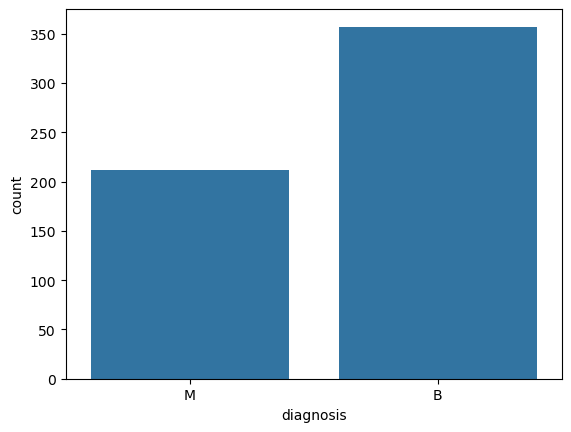

In [8]:
sns.countplot(data=data_df, x='diagnosis')

2. Como hay tres valores relacionados con la misma característica (`mean`, `se` y `worst`) es muy probable que exista multicolinealidad en el conjunto. 

La multicolinealidad en regresión es una condición que ocurre cuando algunas variables predictoras están fuertemente correlacionadas entre sí, de tal manera que si se incluyen simultáneamente en un modelo, impiden explicar de manera correcta el efecto que cada una tiene sobre la variable respuesta. Existen muchas formas de analizar si hay colinealidad en los modelos, una de ellas es el alto coeficiente de correlación entre variables.
 
Para observar este efecto, elabora un mapa de calor que cuantifique la correlación de las variables numéricas en el dataframe. 

<Axes: >

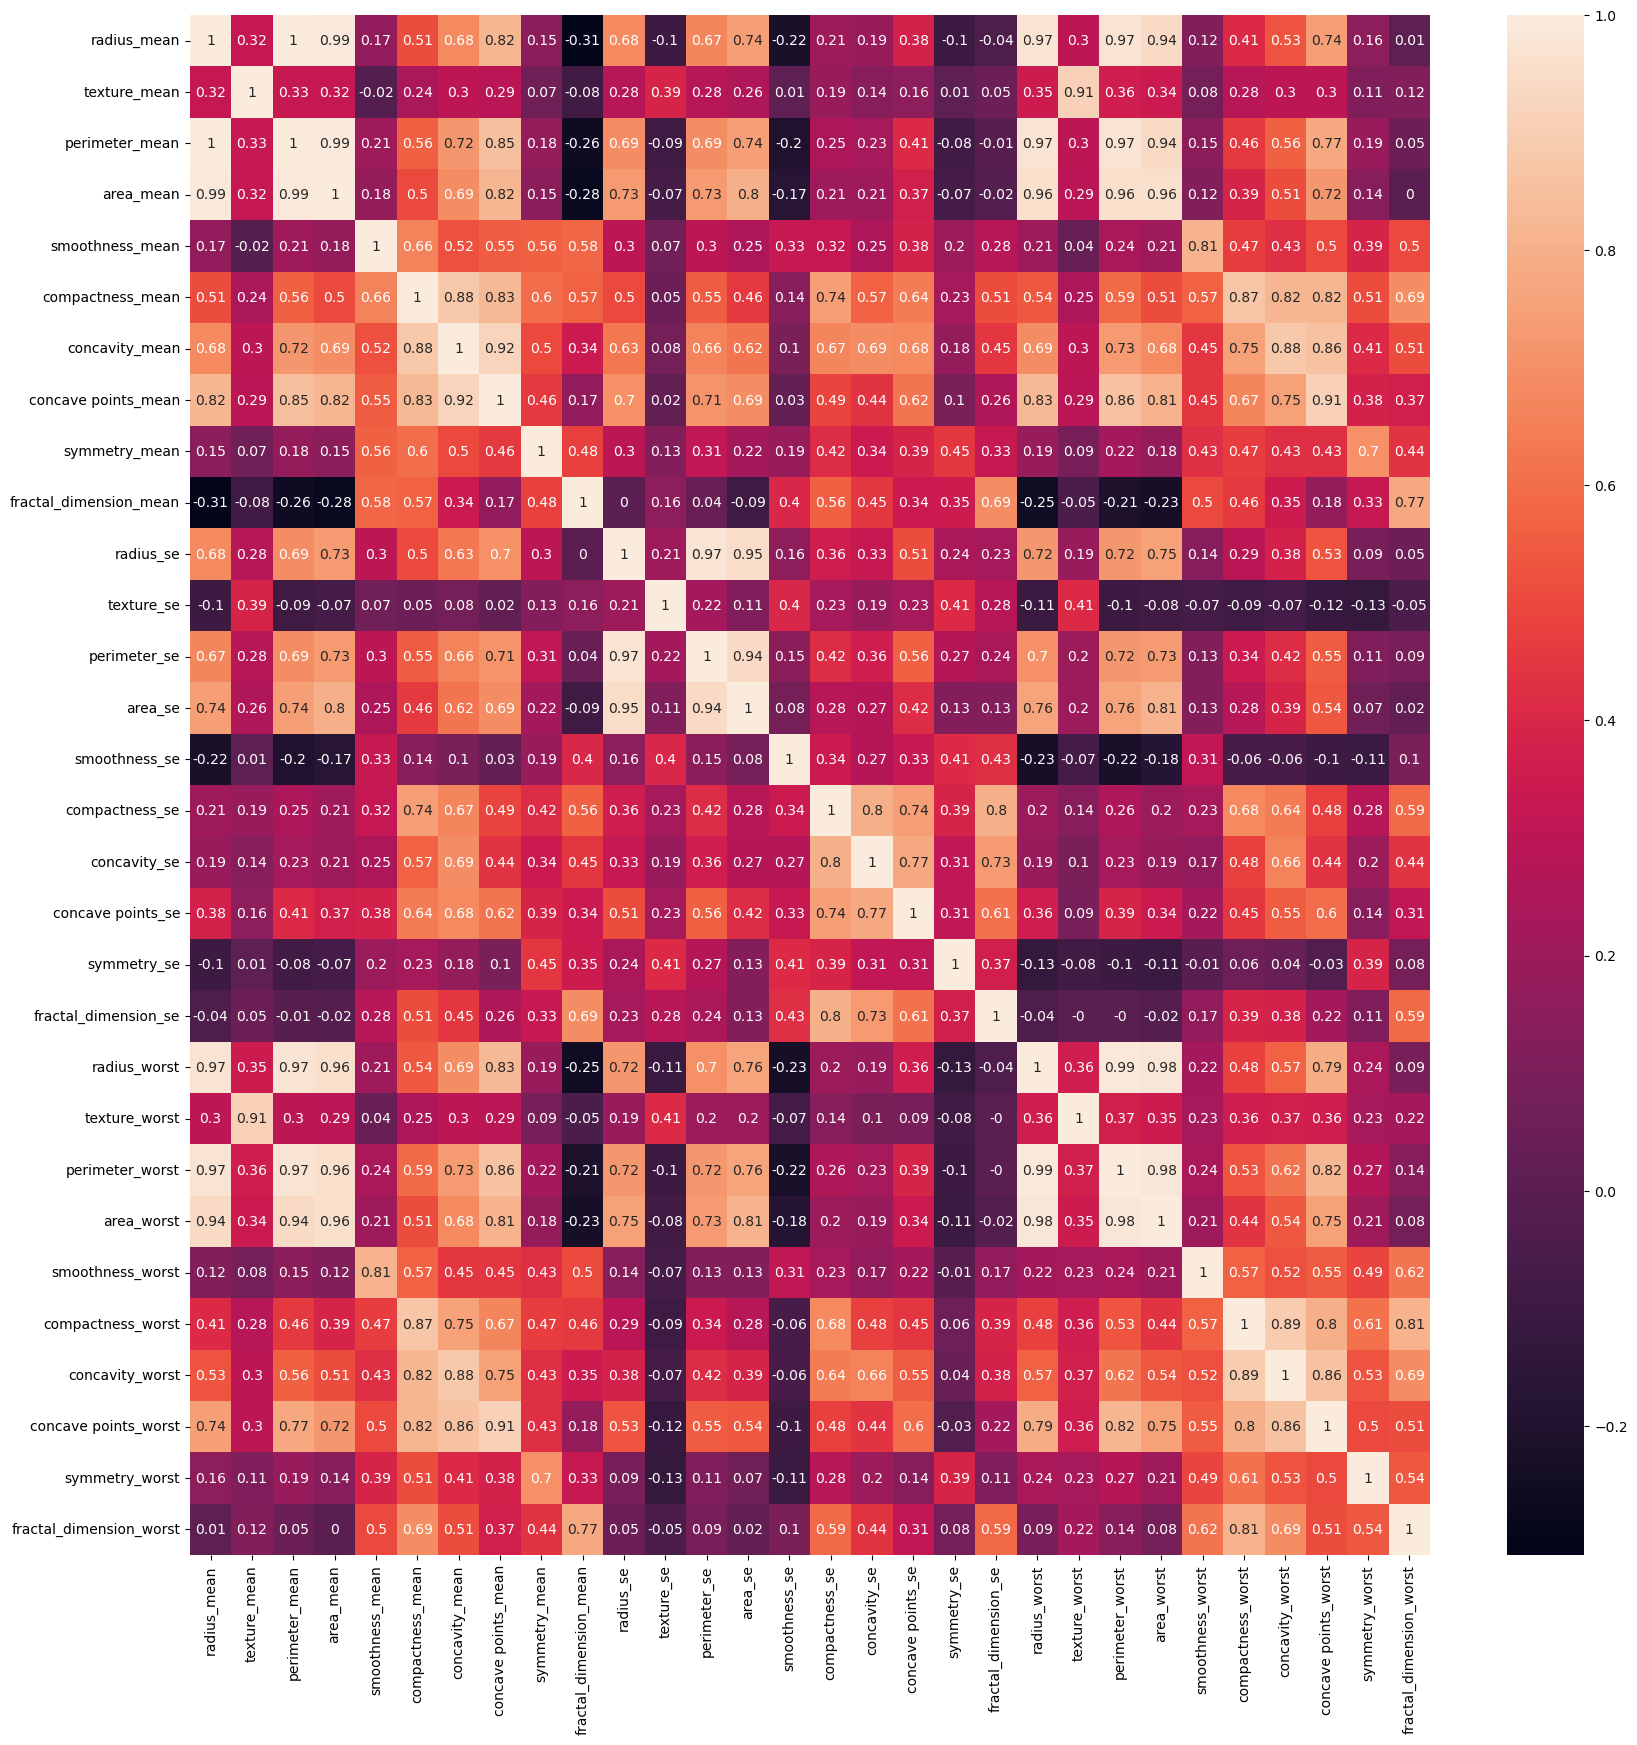

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(round(data_df.corr(numeric_only=True),2),annot=True)

Si te fijas en los valores de correlación entre las variables `_mean` y `_worst` es evidente la multicolinearidad. 

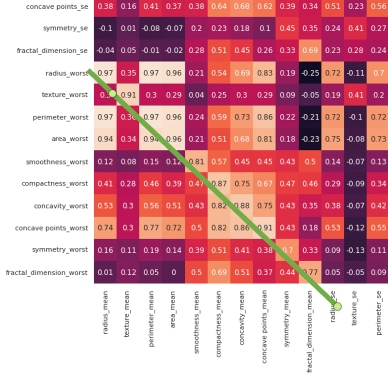

Por ejemplo, la columna `radius_mean` tiene una correlación de 0.97 con la columna `radius_worst`. Esto es algo inevitable, porque las columnas "peores" son esencialmente solo un subconjunto de las columnas "medias". 
 
Para solucionar el problema numérico de la multicolinealidad, tradicionalmente se recurre a eliminar variables o efectuar análisis de componentes principales (PCA) con las `X`’s y usar los componentes como variables independientes en un modelo final.
 
Conduciremos esta actividad en esos dos sentidos.


# **Parte 2**. Modelo con eliminación de variables altamente correlacionadas  

Elimina las variables altamente correlacionadas:

3a) Ahora que sabes que las variables `_mean` y `_worst` tienen correlación alta, hay que quitar del dataframe un conjunto. Borra las columnas `_worst`.

In [10]:
worst_columns = data_df.columns.tolist()
worst_columns = list(filter(lambda x: x.find('_worst') > 0, worst_columns))
data_df.drop(columns=worst_columns, inplace=True)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
 11  radius_se               569 non-null    float64
 12  texture_se              569 non-null    float64
 13  perimeter_se            569 non-null    float64
 14  area_se                 569 non-null    

3b. Entre las variables `_mean`, identifica patrones lineales con diagramas de dispersión usando:



```Python
sns.pairplot(data=data_df[['radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']]) 
```




/Users/alejandrocalderon/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


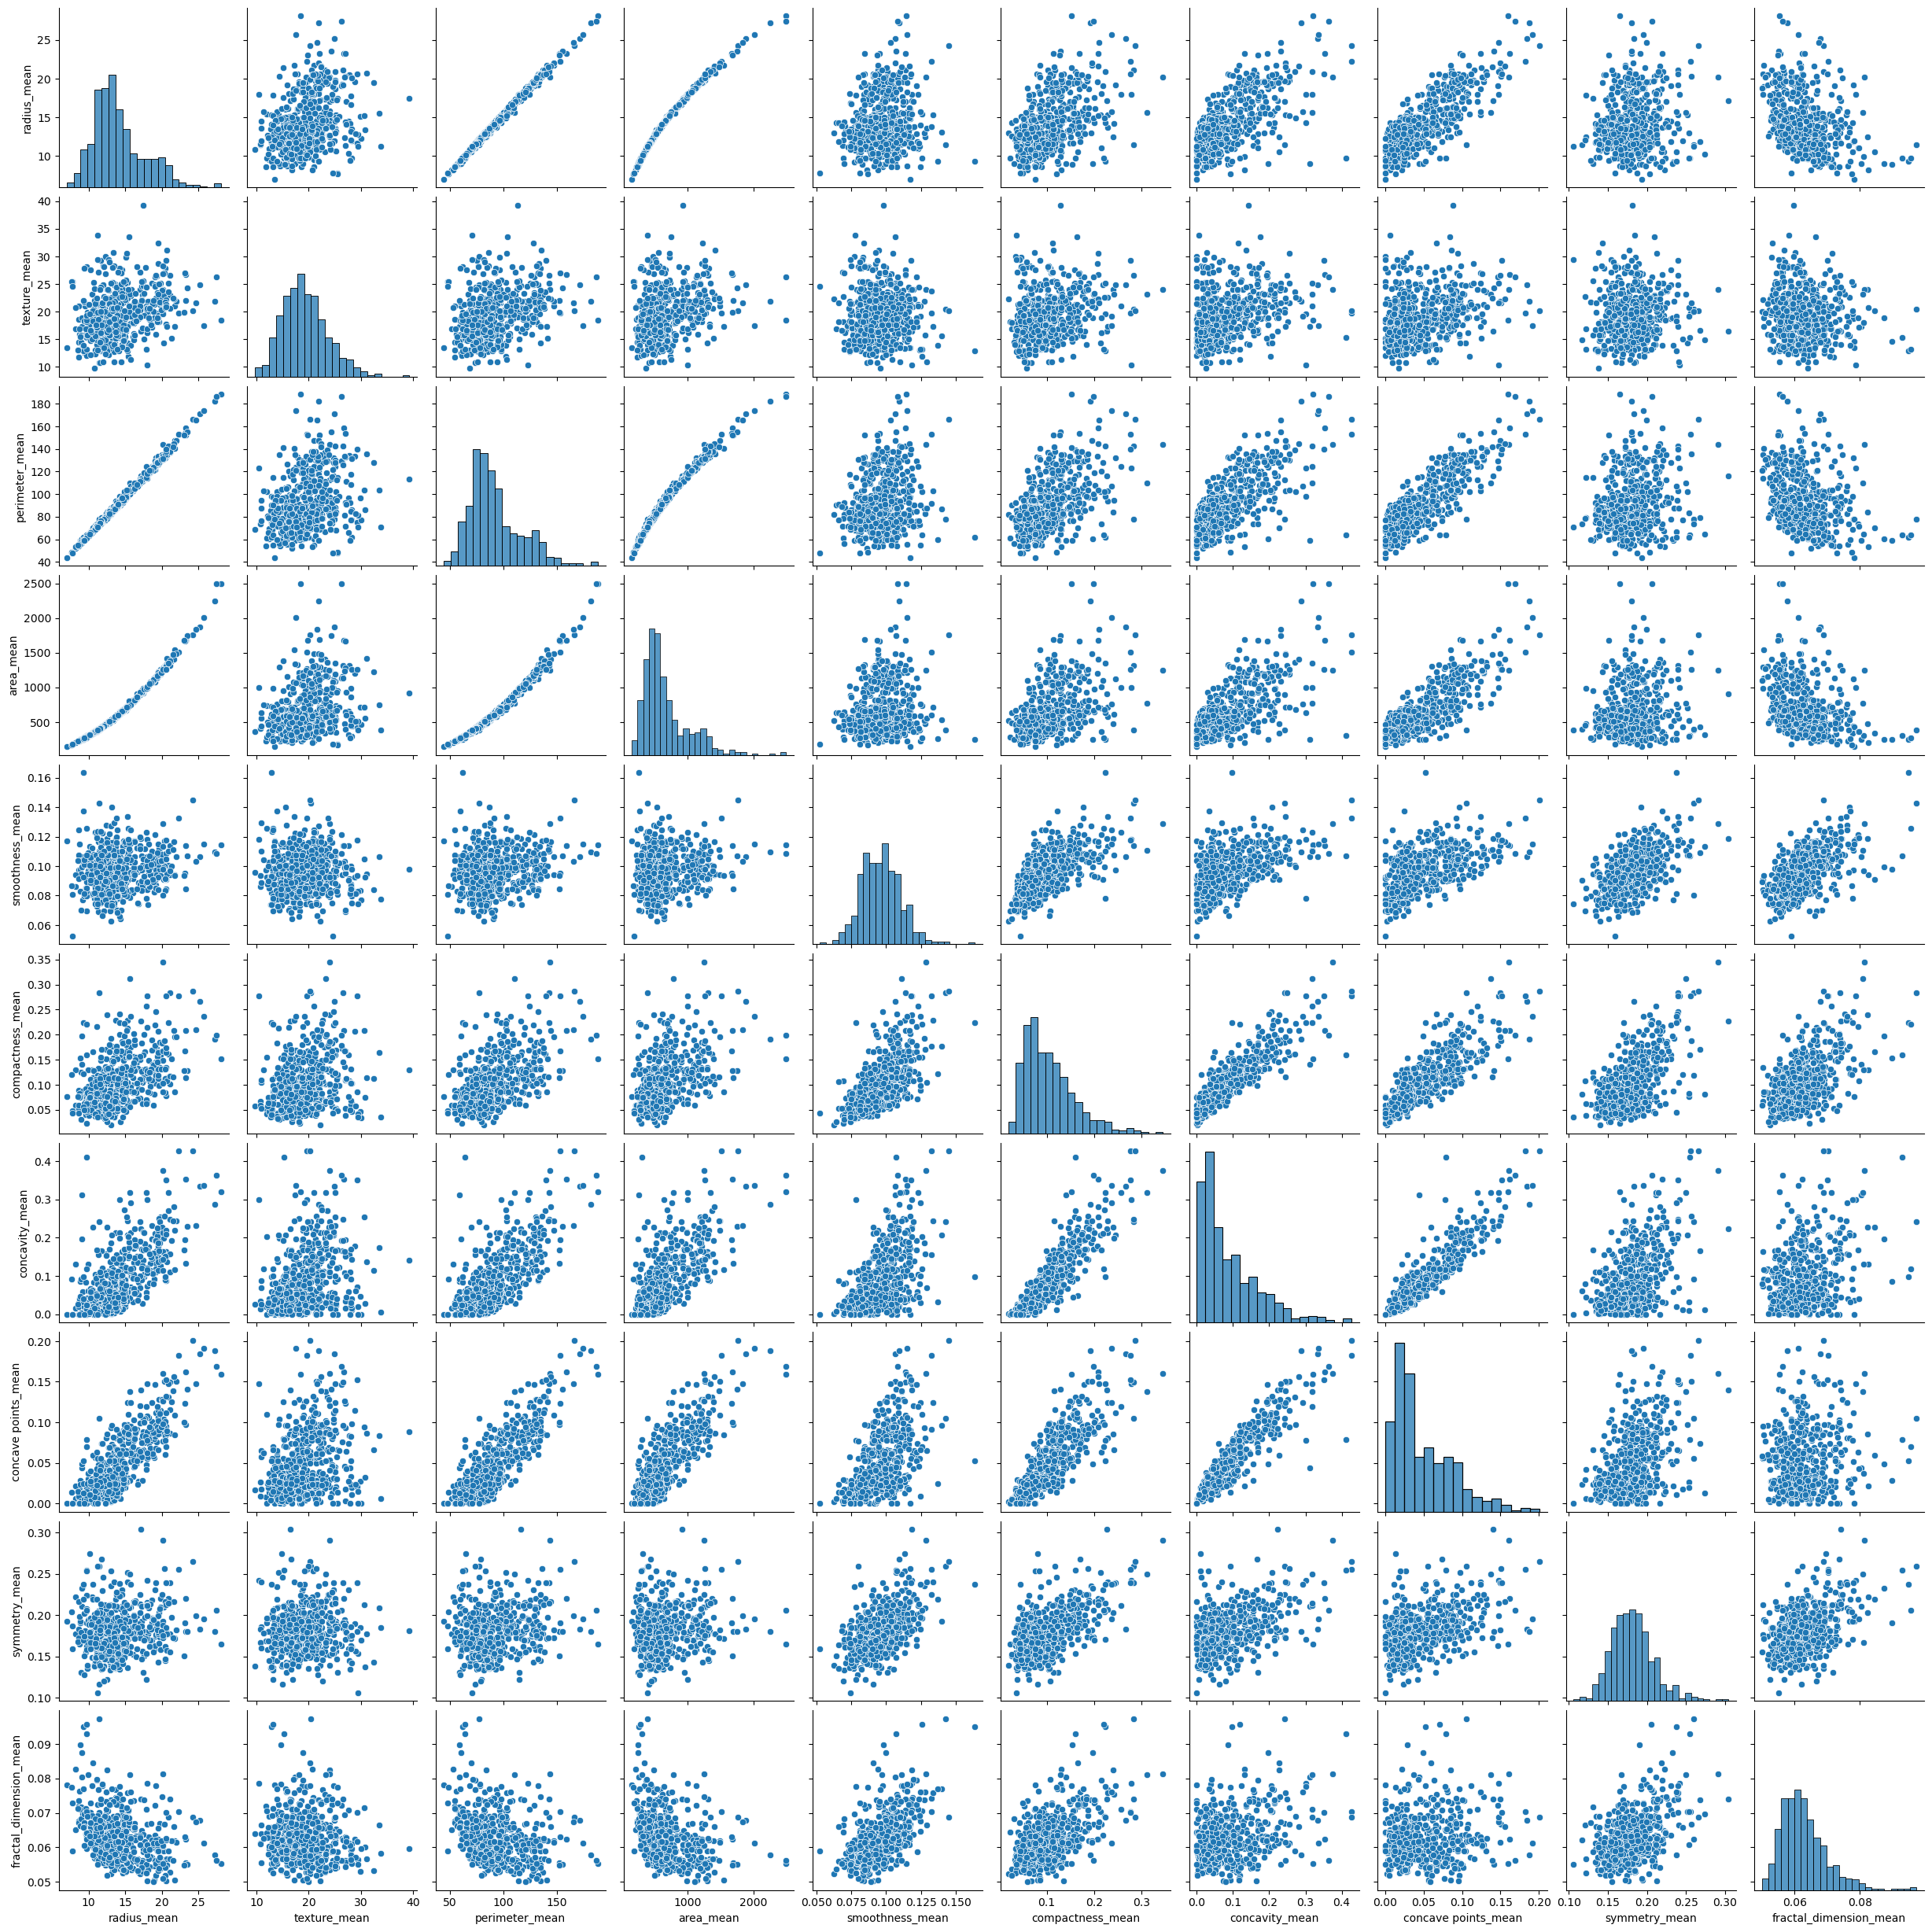

In [11]:
sns.pairplot(data=data_df[['radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']]) 

De la matriz podrás observar relaciones lineales bastante evidentes entre:


*   `radius_mean`, `perimeter_mean` y `area_mean`
*   `compactness_mean`, `concavity_mean`, `concave_points_mean`
 
Sabemos que el perímetro y el área de un círculo, se calculan a partir del radio. Entonces, la relación entre las primeras tres variables es muy clara para nosotros. 

3c) Elabora otro mapa de calor confirmar con los valores de correlación.


<Axes: >

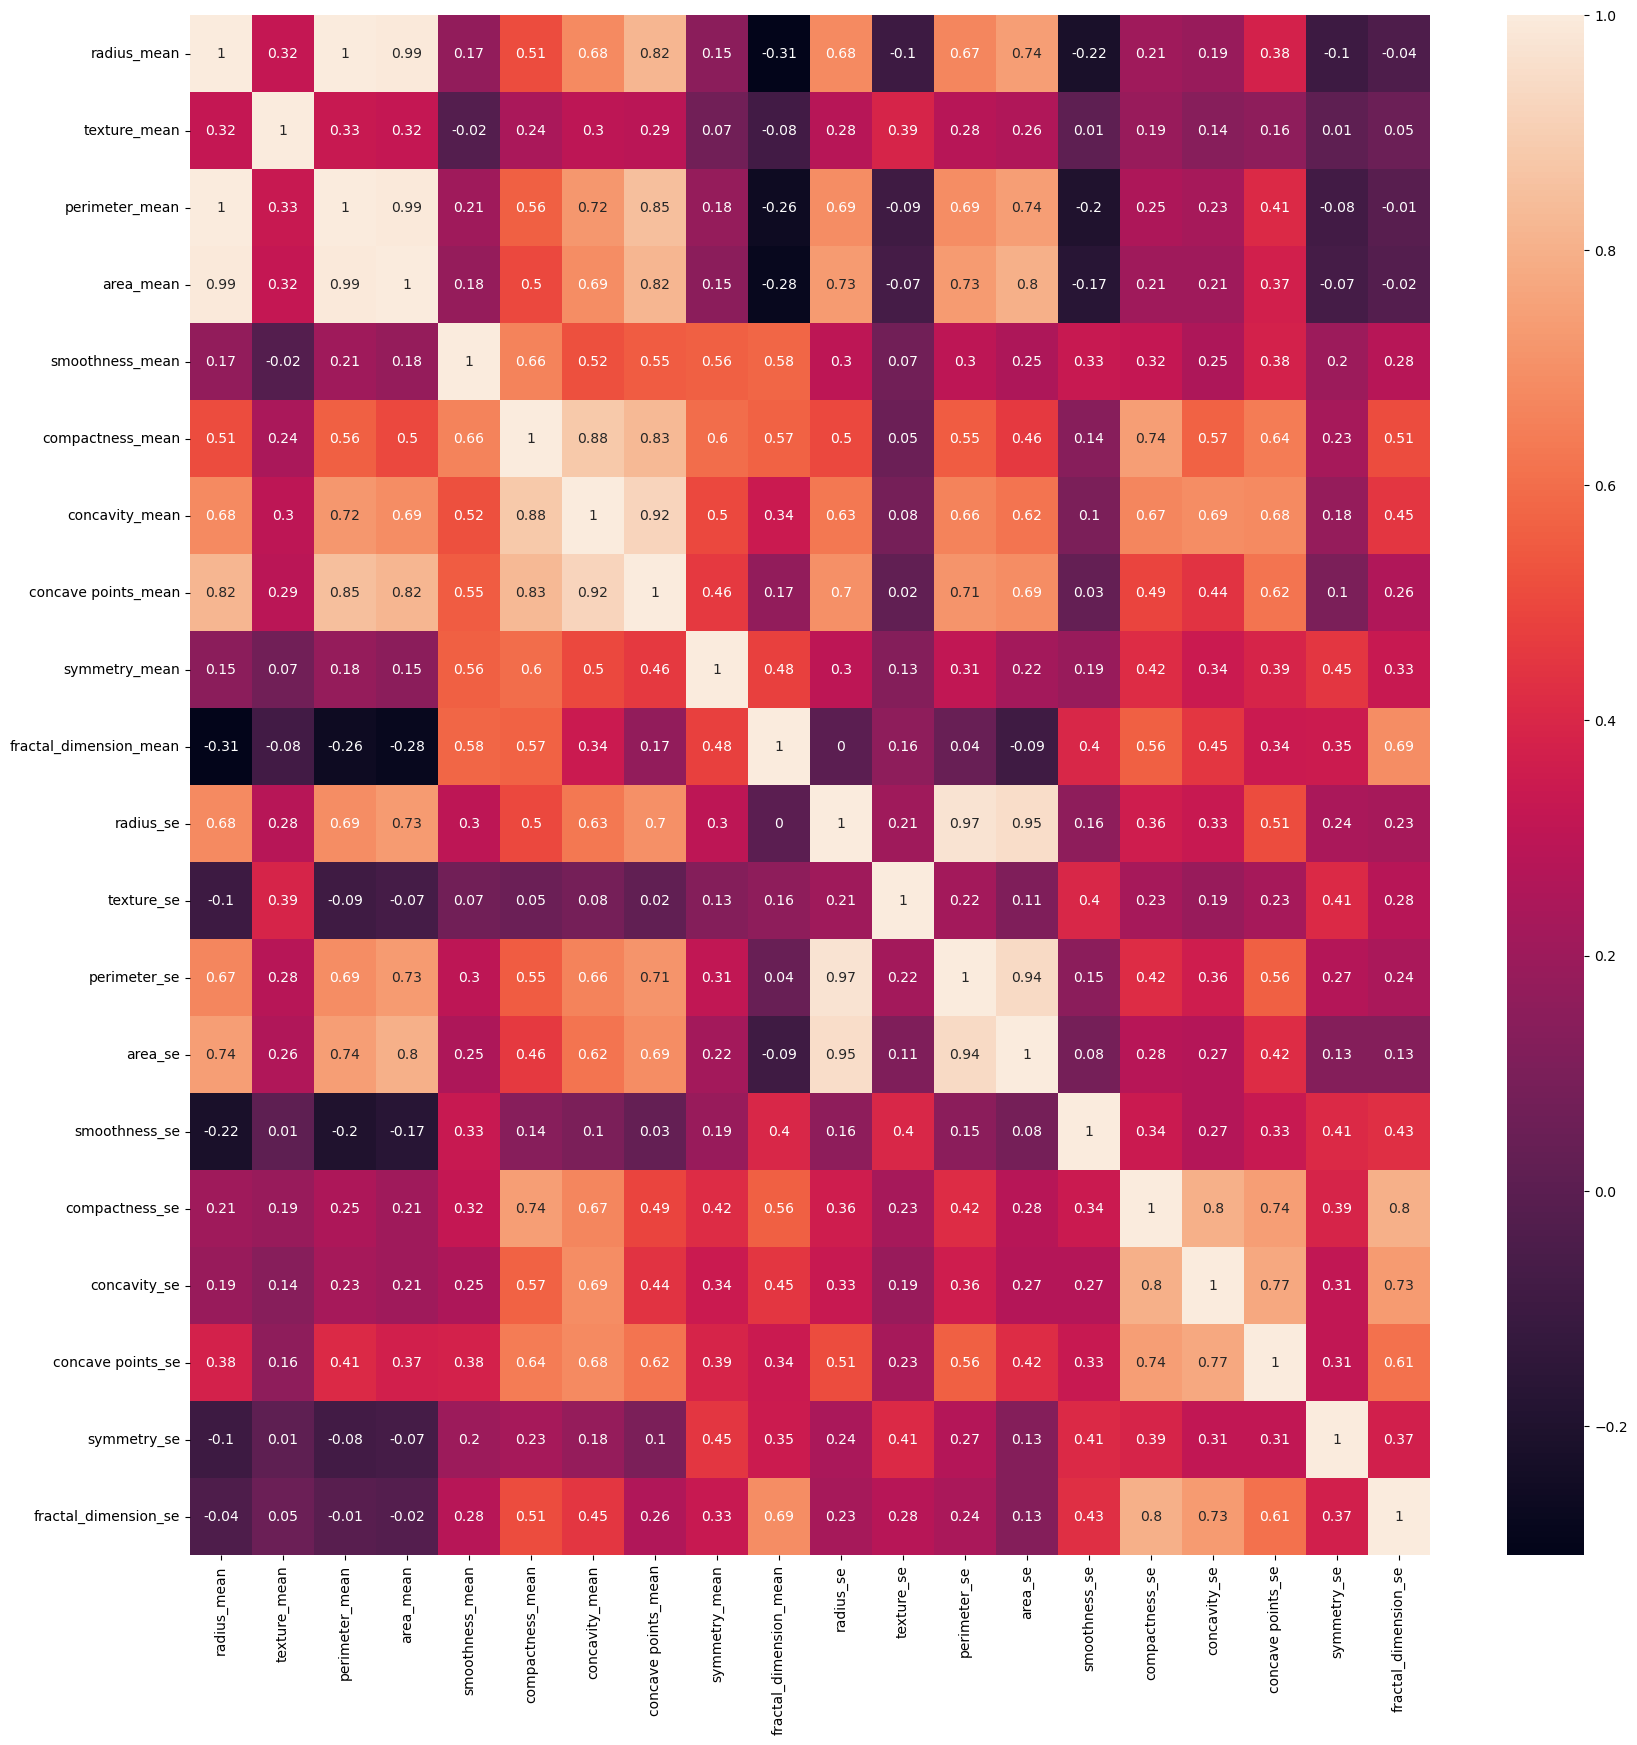

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(round(data_df.corr(numeric_only=True),2), annot=True)

3d) Después de observar los valores, nos quedaremos con sólo una variable de cada trío: `radius_mean` y `compactness_mean`. Elimina las restantes, no sólo del conjunto `_mean`, sino también de `_se`. 

In [13]:
drop_columns = ['perimeter_mean', 'perimeter_se', 'area_mean', 'area_se', 'concavity_mean', 'concavity_se', 'concave points_mean', 'concave points_se']
data_df.drop(columns=drop_columns, inplace=True)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   smoothness_mean         569 non-null    float64
 4   compactness_mean        569 non-null    float64
 5   symmetry_mean           569 non-null    float64
 6   fractal_dimension_mean  569 non-null    float64
 7   radius_se               569 non-null    float64
 8   texture_se              569 non-null    float64
 9   smoothness_se           569 non-null    float64
 10  compactness_se          569 non-null    float64
 11  symmetry_se             569 non-null    float64
 12  fractal_dimension_se    569 non-null    float64
dtypes: float64(12), object(1)
memory usage: 62.2+ KB


Observa la distribución de las variables resultantes (deben ser 12): 

4a) Utilizando histogramas. Guarda en una variable (`skew_cols`) las que tengan marcado sesgo positivo. Para dar seguridad a tu selección, elige aquellas cuyo resultado de aplicar la función `skew()` sea mayor a 1. 

In [14]:
numerical_variables = data_df.select_dtypes(include=['int', 'float']).columns.tolist()
print('Numerical variables:',numerical_variables)
categorical_variables = data_df.select_dtypes(include=['object']).columns.tolist()
print('Categorical variables:', categorical_variables)

Numerical variables: ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'symmetry_se', 'fractal_dimension_se']
Categorical variables: ['diagnosis']


In [15]:
skew_cols = data_df[numerical_variables].skew().to_dict()
skew_cols = list(filter(lambda x: skew_cols[x] > 1.0,skew_cols))
skew_cols

['compactness_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'smoothness_se',
 'compactness_se',
 'symmetry_se',
 'fractal_dimension_se']

In [16]:
data_df[numerical_variables].kurtosis()

radius_mean                0.845522
texture_mean               0.758319
smoothness_mean            0.855975
compactness_mean           1.650130
symmetry_mean              1.287933
fractal_dimension_mean     3.005892
radius_se                 17.686726
texture_se                 5.349169
smoothness_se             10.469840
compactness_se             5.106252
symmetry_se                7.896130
fractal_dimension_se      26.280847
dtype: float64

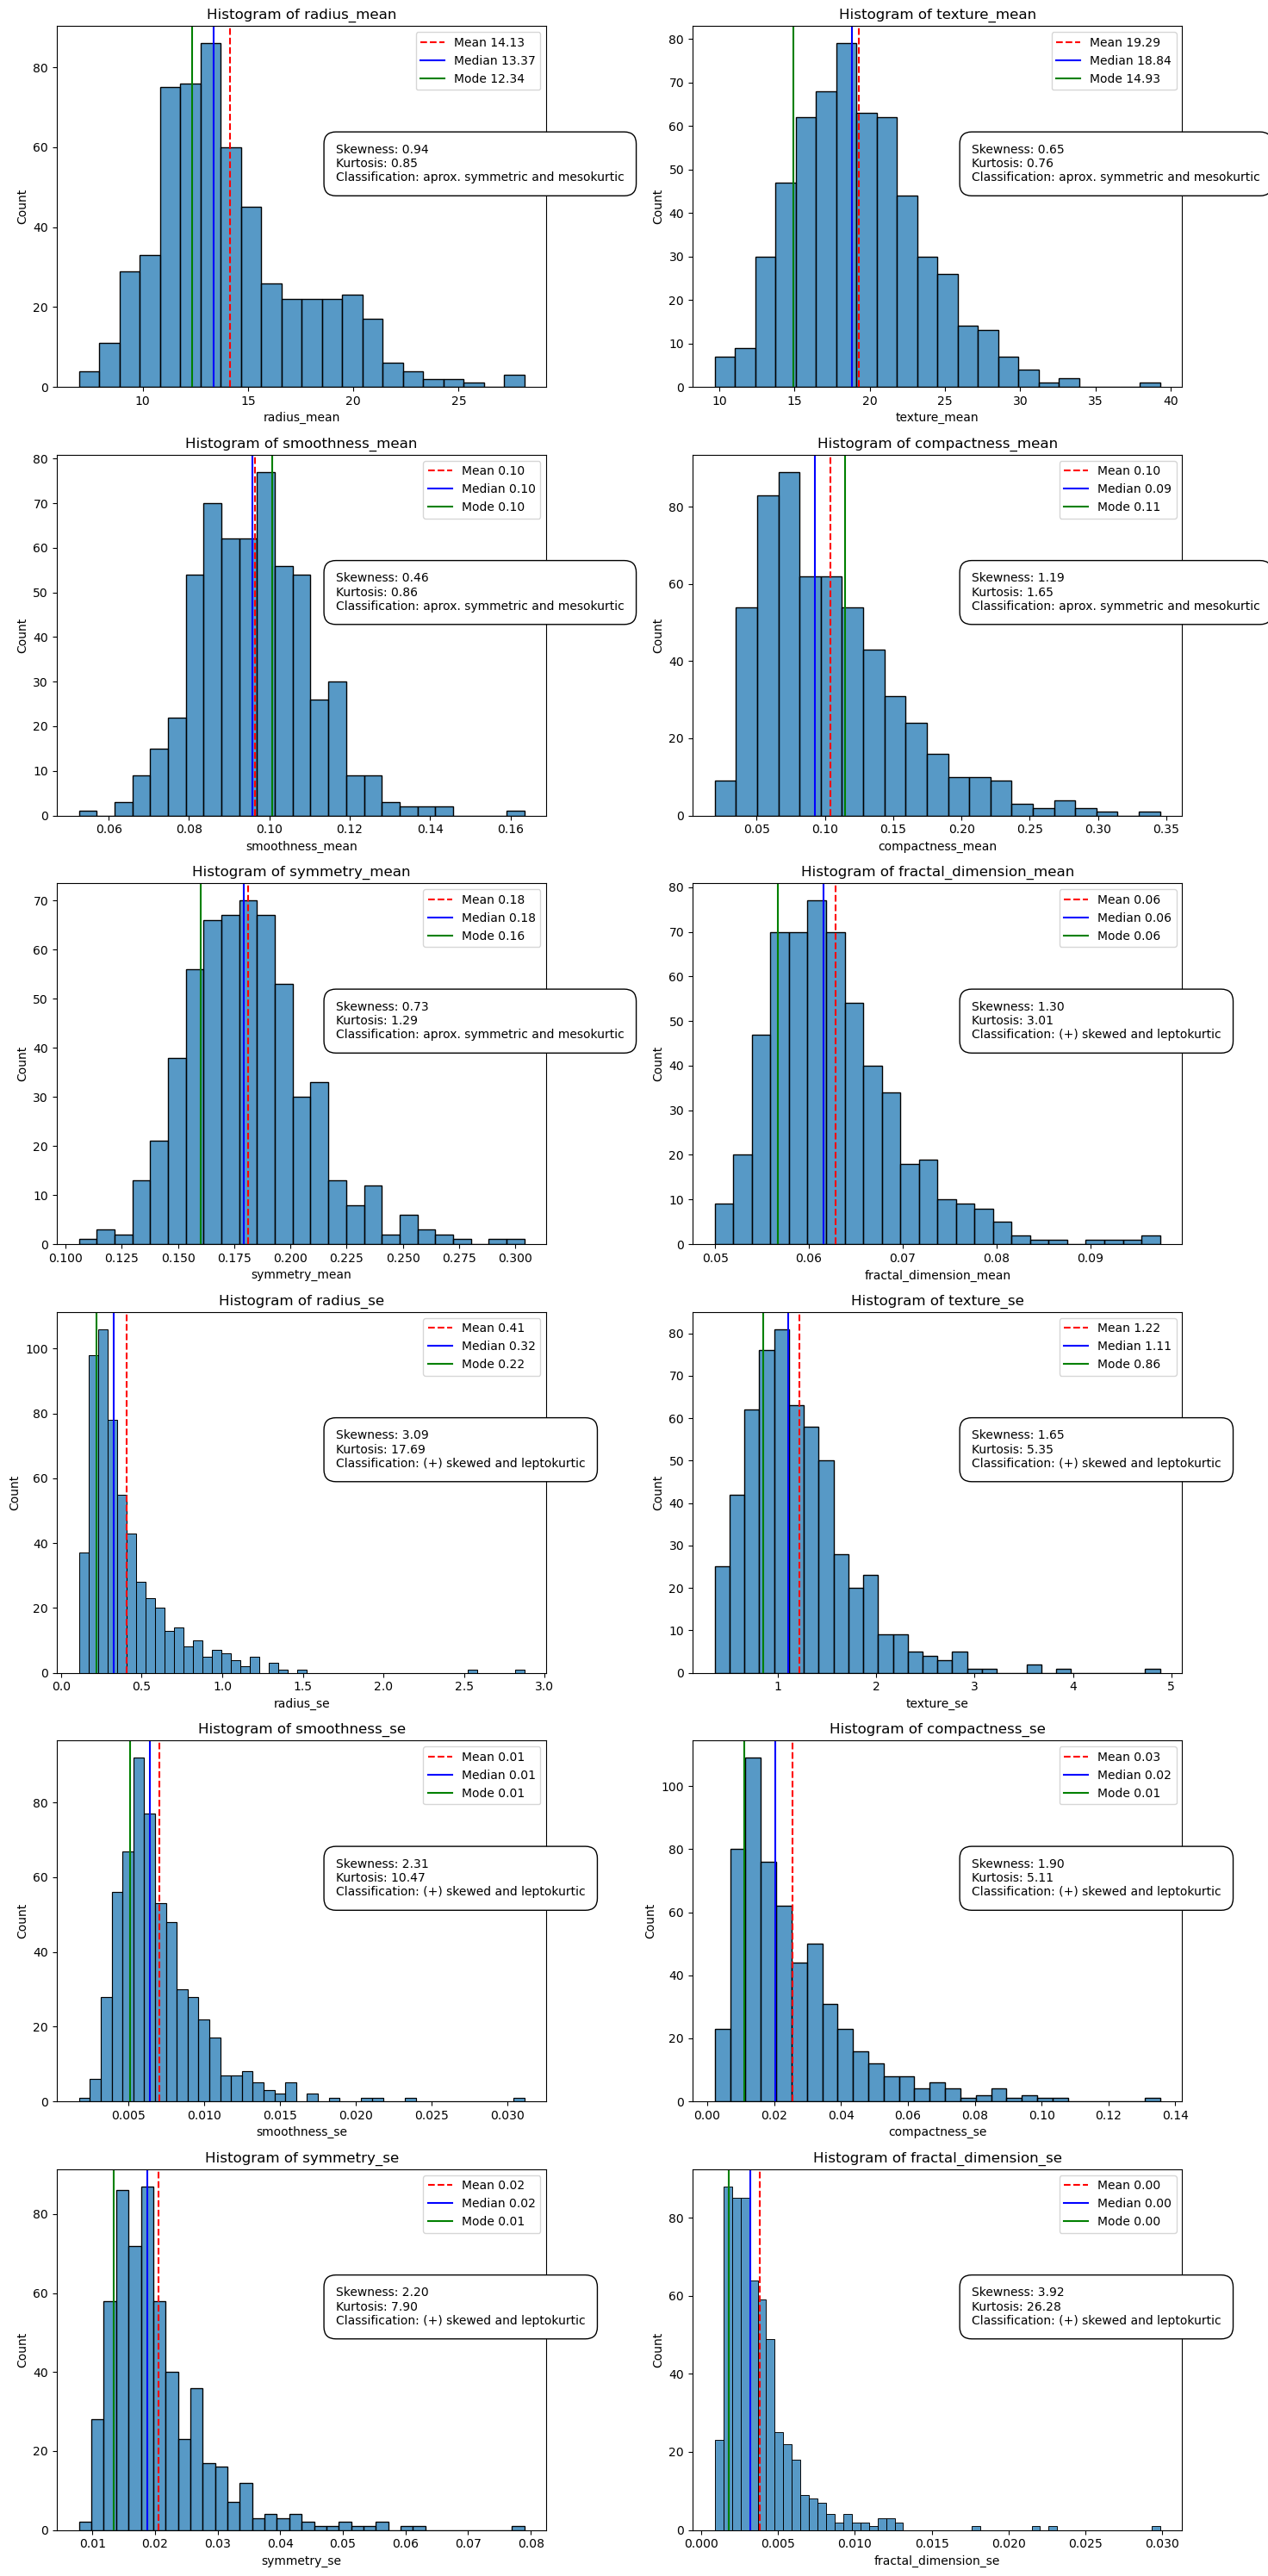

In [17]:
plt.figure(figsize=(15,30))
for i, col in enumerate(numerical_variables, 1):
    info_col = data_df[col]
    mean = info_col.mean()
    median = info_col.median()
    mode = info_col.mode().iloc[0]
    
    skewness = info_col.skew()
    kurtosis = info_col.kurtosis()

    if skewness < -1 and kurtosis > 3:
        classification = "(-) skewed and leptokurtic"
    elif skewness > 1 and kurtosis > 3:
        classification = "(+) skewed and leptokurtic"
    elif skewness < -1 and kurtosis < 0:
        classification = "(-) skewed and platykurtic"
    elif skewness > 1 and kurtosis < 0:
        classification = "(+) skewed and platykurtic"
    else:
        classification = "aprox. symmetric and mesokurtic"

    plt.subplot(6,2, i)
    plt.axvline(x=mean, linestyle='--', color='red', label=f'Mean {mean:.2f}')
    plt.axvline(x=median, linestyle='-', color='blue', label =f'Median {median:.2f}')
    plt.axvline(x=mode, linestyle='-', color='green', label=f'Mode {mode:.2f}')
    annotation_text = f'Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}\nClassification: {classification}'
    plt.annotate(annotation_text, xy=(0.57, 0.57), xycoords='axes fraction', fontsize=10, ha='left',bbox=dict(boxstyle='round', fc='w', ec='k', pad=1.0, alpha=1))
    plt.legend()
    plt.title(f'Histogram of {col}')
    sns.histplot(data=data_df,x=col)
plt.tight_layout()

4b) Dibujando box plots de todas las variables. Guarda en una variable (`scale_cols`) aquellas que no se encuentren en el intervalo [0,1]


In [18]:
scale_cols = list(filter(lambda col: len(data_df[(data_df[col] > 1.0) |( data_df[col] < 0.0)]) > 0, numerical_variables))
scale_cols

['radius_mean', 'texture_mean', 'radius_se', 'texture_se']

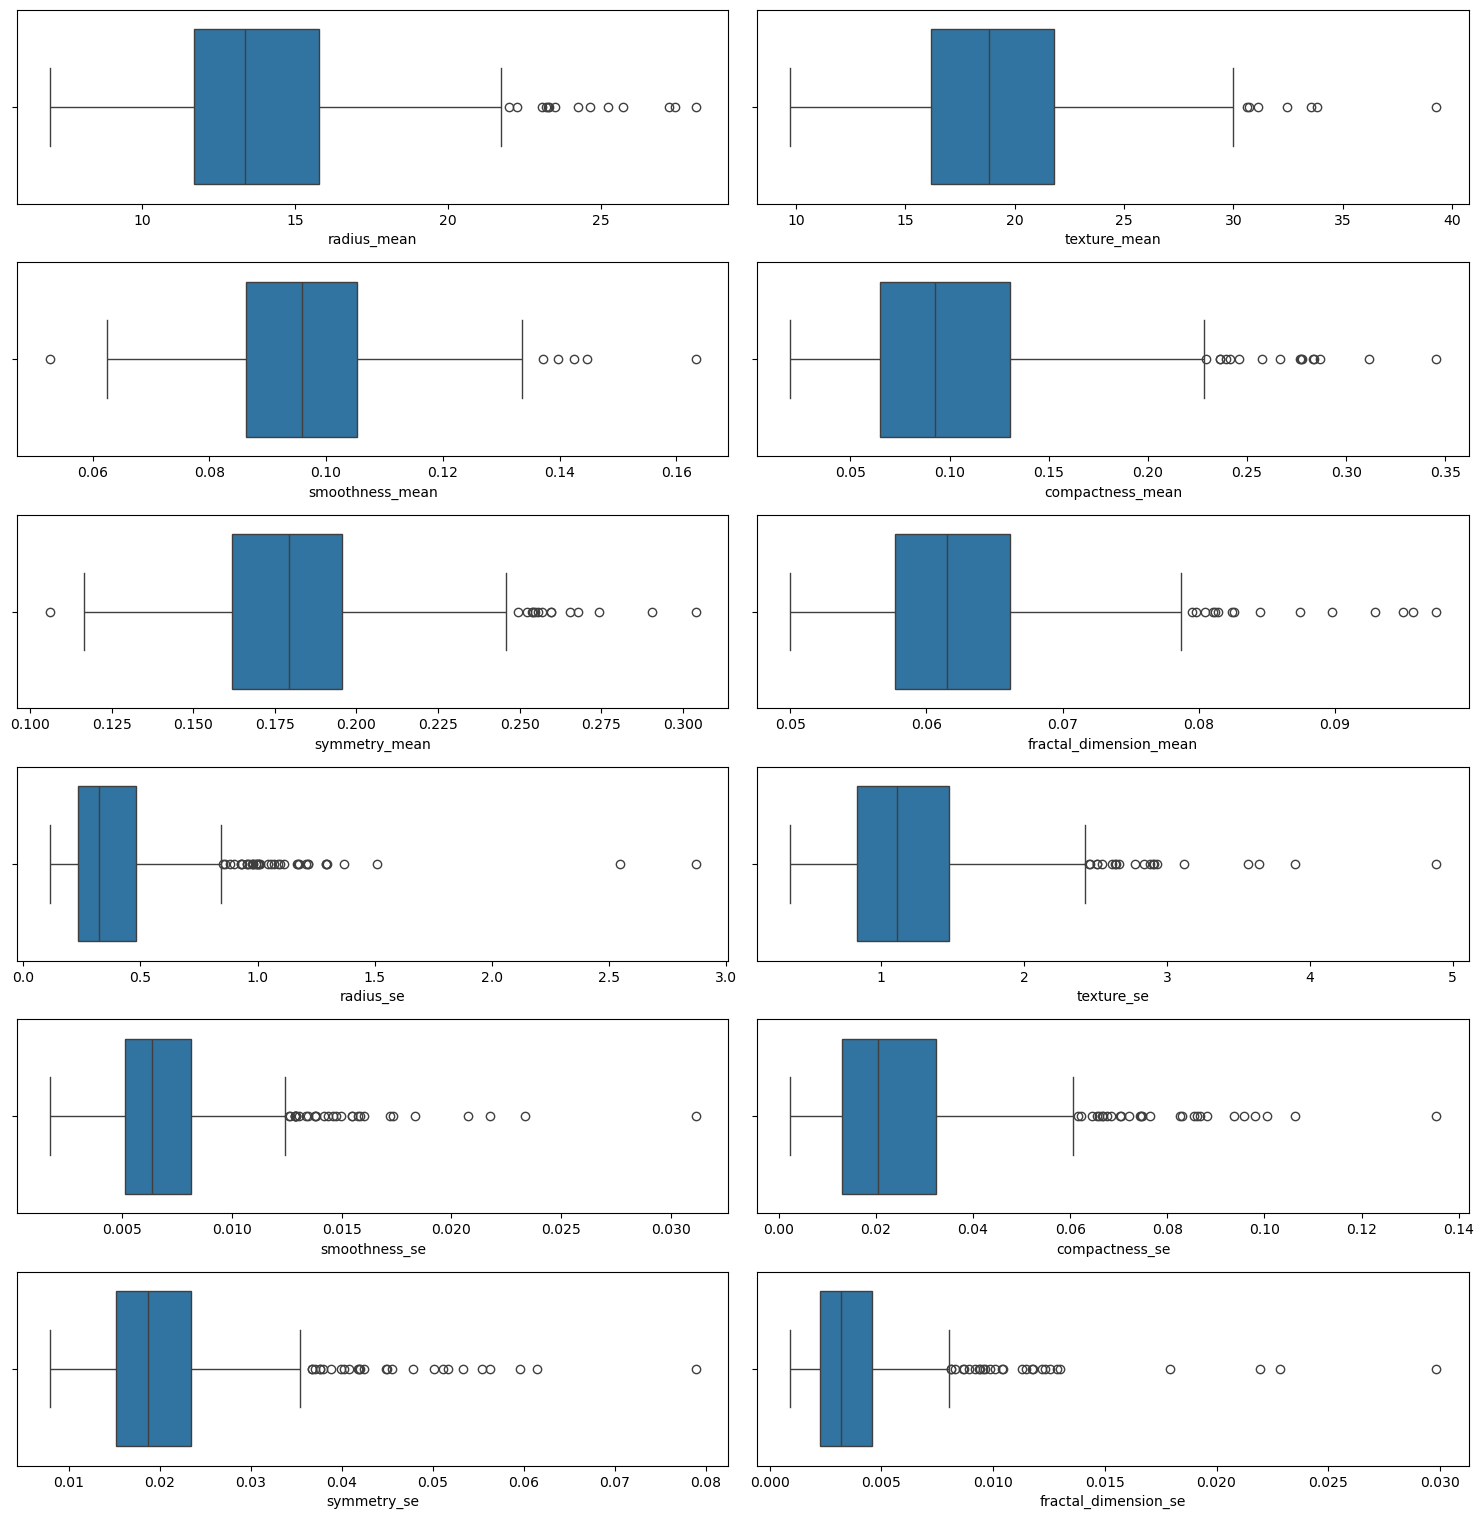

In [19]:
plt.figure(figsize=(15,30))
for i, col in enumerate(numerical_variables, 1):
    plt.subplot(12, 2, i)
    sns.boxplot(data=data_df, x=col)
plt.tight_layout()

Con todo el análisis anterior, estamos listos para generar un modelo *baseline* denominado `logr_model`. Para ello:

5a) Vuelve a leer el contenido del archivo, haz que el `id` sea el índice y separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`diagnosis`). Divide el conjunto en entrenamiento y prueba (80:20) considerando el parámetro `random_state` con el valor de 1.

In [20]:
cancer_df = pd.read_csv('data.csv')
cancer_df.set_index('id', inplace=True)
cancer_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [21]:
X = cancer_df.drop(columns=['diagnosis'])
y = cancer_df.loc[:,'diagnosis']

In [22]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [23]:
y

id
842302      M
842517      M
84300903    M
84348301    M
84358402    M
           ..
926424      M
926682      M
926954      M
927241      M
92751       B
Name: diagnosis, Length: 569, dtype: object

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

In [25]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
90524101,17.99,20.66,117.80,991.7,0.10360,0.13040,0.120100,0.088240,0.1992,0.06069,...,21.080,25.41,138.10,1349.0,0.14820,0.37350,0.33010,0.19740,0.3060,0.08503
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
89346,9.00,14.40,56.36,246.3,0.07005,0.03116,0.003681,0.003472,0.1788,0.06833,...,9.699,20.07,60.90,285.5,0.09861,0.05232,0.01472,0.01389,0.2991,0.07804
902975,12.21,14.09,78.78,462.0,0.08108,0.07823,0.068390,0.025340,0.1646,0.06154,...,13.130,19.29,87.65,529.9,0.10260,0.24310,0.30760,0.09140,0.2677,0.08824
904969,12.34,14.95,78.29,469.1,0.08682,0.04571,0.021090,0.020540,0.1571,0.05708,...,13.180,16.85,84.11,533.1,0.10480,0.06744,0.04921,0.04793,0.2298,0.05974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866674,19.79,25.12,130.40,1192.0,0.10150,0.15890,0.254500,0.114900,0.2202,0.06113,...,22.630,33.58,148.70,1589.0,0.12750,0.38610,0.56730,0.17320,0.3305,0.08465
869254,10.75,14.97,68.26,355.3,0.07793,0.05139,0.022510,0.007875,0.1399,0.05688,...,11.950,20.72,77.79,441.2,0.10760,0.12230,0.09755,0.03413,0.2300,0.06769
859717,17.20,24.52,114.20,929.4,0.10710,0.18300,0.169200,0.079440,0.1927,0.06487,...,23.320,33.82,151.60,1681.0,0.15850,0.73940,0.65660,0.18990,0.3313,0.13390


In [26]:
y_train

id
90524101    M
84358402    M
89346       B
902975      B
904969      B
           ..
866674      M
869254      B
859717      M
88249602    B
854941      B
Name: diagnosis, Length: 455, dtype: object

In [27]:
y_test

id
906564      B
85715       M
891670      B
874217      M
905680      M
           ..
87164       M
84348301    M
859471      B
911150      B
90944601    B
Name: diagnosis, Length: 114, dtype: object

5b) Prepara un transformador, denominado `preprocessing`, para borrar las columnas altamente correlacionadas (las 18 variables que se determinaron en los ejercicios previos) Asegúrate de incluir el parámetro `remainder='passthrough'` para mantener el resto de las variables.

In [28]:
from sklearn.compose import ColumnTransformer
drop_variables = worst_columns + drop_columns
print('total of variables to remove:',len(drop_variables))
for i, col in enumerate(drop_variables, 1):
    print(f'{i}.', col)
preprocessing = ColumnTransformer(remainder='passthrough',transformers=[('remove','drop', drop_variables)])

total of variables to remove: 18
1. radius_worst
2. texture_worst
3. perimeter_worst
4. area_worst
5. smoothness_worst
6. compactness_worst
7. concavity_worst
8. concave points_worst
9. symmetry_worst
10. fractal_dimension_worst
11. perimeter_mean
12. perimeter_se
13. area_mean
14. area_se
15. concavity_mean
16. concavity_se
17. concave points_mean
18. concave points_se


5c) Entrena el modelo `logr_model` con el transformador `preprocessing` y  regresión logística. 

Como la salida `y` está en términos de las etiquetas `'B'` y `'M'`, en lugar de 0 y 1, para evaluar el modelo en el conjunto de prueba deberás especificar la clase positiva. En el caso de la matriz de confusión, indica el orden de las etiquetas con `labels=['B','M']`, porque `'B'` es la clase negativa (ésta se especifica primero) y `'M'` la positiva. Para las métricas de *recall* y *precision*, utiliza el parámetro `pos_label='M'`. Como *accuracy* ocupa la suma de ambas clases y el total de las observaciones, no requiere ninguna especificación. Si quisieras omitir estos parámetros, tendrías que sustituir `'B'` por 0 y `'M'` por 1, previo a la construcción del modelo. 

In [29]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

def plotLogisticReg(threshold, logr_model, X_train, y_train, label):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    y_scores = cross_val_predict(logr_model, X_train, y_train, cv=3,method="decision_function")
    precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores, pos_label=label)
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
    plt.show()

PRECISION = TP / (TP + FP)  ==> 32 / (32 + 4)  = 0.8888888888888888
RECALL    = TP / (TP + FN)  ==> 32 / (32 + 10) = 0.7619047619047619
ACCURANCY = (TP + TN) / (TP + TN + FP + FN) ==> (32 + 68) / (32 + 68 + 4 + 10) = 0.8771929824561403


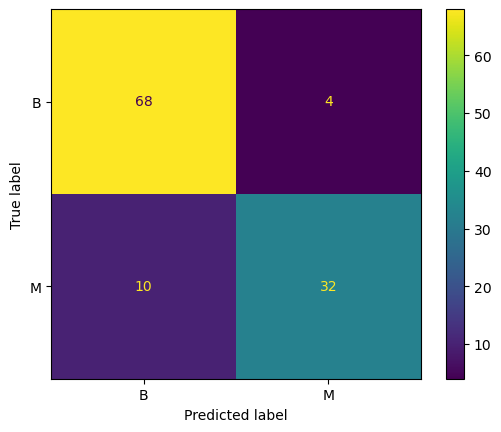

In [30]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score


def infoLogisticReg(y_test, prediction, logr_model, pos_la): 
    cm = confusion_matrix(y_test, prediction, labels=logr_model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logr_model.classes_)
    disp.plot()
    tp = cm[1][1]
    fp = cm[0][1]
    fn = cm[1][0]
    tn = cm[0][0]
    print(f'PRECISION = TP / (TP + FP)  ==> {tp} / ({tp} + {fp})  =', precision_score(y_test, prediction, pos_label=pos_la))
    print(f'RECALL    = TP / (TP + FN)  ==> {tp} / ({tp} + {fn}) =', recall_score(y_test, prediction, pos_label=pos_la))
    print(f'ACCURANCY = (TP + TN) / (TP + TN + FP + FN) ==> ({tp} + {tn}) / ({tp} + {tn} + {fp} + {fn}) =', accuracy_score(y_test, prediction))

logr_model = make_pipeline(preprocessing, LogisticRegression())
logr_model.fit(X_train, y_train)
predict = logr_model.predict(X_test)
infoLogisticReg(y_test, predict, logr_model, 'M')

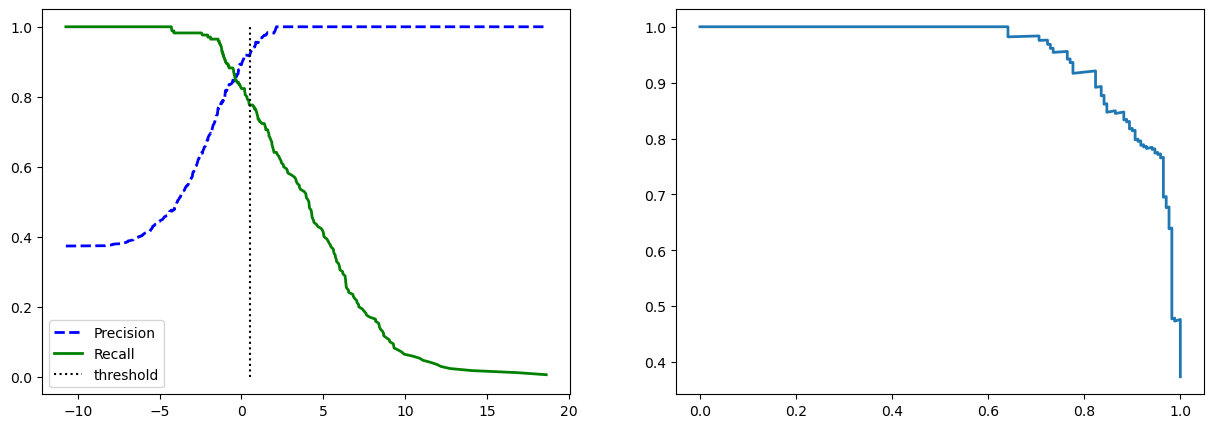

In [31]:
plotLogisticReg(0.5, logr_model, X_train, y_train, 'M')

Para generar un modelo `logr_model2` con transformación y escalamiento:

6a) Modifica el transformador anterior para, además del borrado de las columnas correlacionadas, aplicar la raíz cuadrada a los predictores con sesgo (previamente almacenados en `skew_cols`) y escalamiento *MinMax* a los predictores con escala mayor a 1 (previamente almacenados en `scale_cols`) Como no todos los predictores serán eliminados o transformados, asegúrate de incluir el parámetro `remainder='passthrough'` 

In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer
import numpy as np

def sqrt_transform(X):
    return np.sqrt(X)

preprocessing = ColumnTransformer(remainder='passthrough',transformers=[
    ('remove', 'drop', drop_variables),
    ('skew_cols', FunctionTransformer(sqrt_transform, validate = False), skew_cols),
    ('scale_cols', MinMaxScaler(), scale_cols)])

6b) Entrena el modelo `logr_model2` con regresión logística, aplicando previamente el transformador modificado. Evalúa el modelo en el conjunto de prueba con las mismas métricas.

PRECISION = TP / (TP + FP)  ==> 31 / (31 + 0)  = 1.0
RECALL    = TP / (TP + FN)  ==> 31 / (31 + 11) = 0.7380952380952381
ACCURANCY = (TP + TN) / (TP + TN + FP + FN) ==> (31 + 72) / (31 + 72 + 0 + 11) = 0.9035087719298246


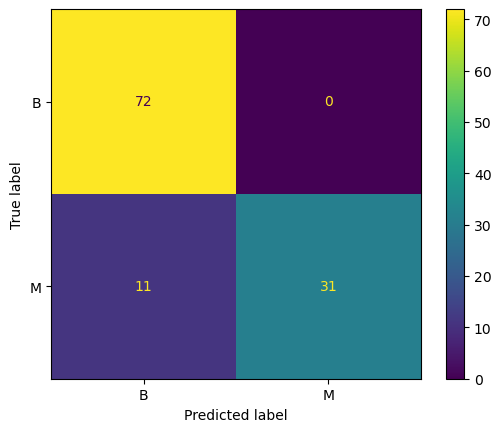

In [34]:
logr_model2 = make_pipeline(preprocessing, LogisticRegression())
logr_model2.fit(X_train, y_train)
prediction = logr_model2.predict(X_test)
infoLogisticReg(y_test, prediction, logr_model2, 'M')

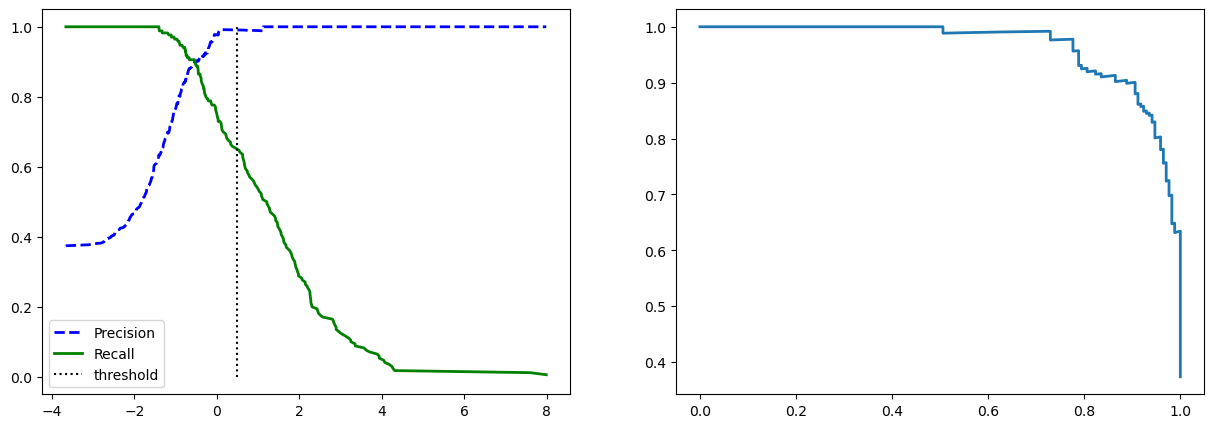

In [35]:
plotLogisticReg(0.5, logr_model2, X_train, y_train, 'M')

# **Parte 3**. Modelo con aplicación de PCA 

7. Analizaremos el efecto de aplicar PCA a todas las variables. Recuerda que previo a aplicarlo es recomendado escalar todas las variables. Utiliza la clase `StandardScaler` para transformar `X`.

In [36]:
from sklearn.decomposition import PCA 
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
x_scaled = pd.DataFrame(x_scaled, columns=scaler.get_feature_names_out())
x_scaled

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


8. Aplica PCA al conjunto escalado y determina el número de componentes que explican el 99% de la varianza. 

In [37]:
pca = PCA()
x_projected = pca.fit_transform(x_scaled)
x_projected = pd.DataFrame(x_projected, columns=scaler.get_feature_names_out())
x_projected

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,...,0.096515,0.068850,0.084519,-0.175256,-0.151020,-0.201503,-0.252585,-0.033914,0.045648,-0.047169
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,...,-0.077327,-0.094578,-0.217718,0.011290,-0.170510,-0.041129,0.181270,0.032624,-0.005687,-0.001868
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,...,0.311067,-0.060309,-0.074291,0.102762,0.171158,0.004735,0.049569,0.047026,0.003146,0.000751
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,...,0.434193,-0.203266,-0.124105,0.153430,0.077496,-0.275225,0.183462,0.042484,-0.069295,-0.019937
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,...,-0.116545,-0.017650,0.139454,-0.005332,0.003062,0.039254,0.032168,-0.034786,0.005038,0.021214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989,...,0.006888,-0.067000,0.088590,0.107898,0.219520,-0.122900,0.159198,0.009853,0.007119,-0.001415
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632,...,-0.009802,0.019563,-0.055405,0.086135,0.001197,0.065889,-0.068512,-0.023575,-0.027486,-0.010419
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877,...,-0.036592,0.063352,-0.200312,-0.044819,0.002429,0.007095,-0.023691,-0.002578,0.006706,0.003770
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280239,-0.542035,-0.089296,...,0.140648,-0.042478,0.168820,-0.195969,0.377830,-0.198192,-0.027409,-0.068086,-0.084163,-0.023783


Número mínimo de componentes para explicar el 99% de la varianza: 17
Porcentaje de varianza explicada acumulada por cada componente principal:
Componente 1: 0.4427
Componente 2: 0.6324
Componente 3: 0.7264
Componente 4: 0.7924
Componente 5: 0.8473
Componente 6: 0.8876
Componente 7: 0.9101
Componente 8: 0.9260
Componente 9: 0.9399
Componente 10: 0.9516
Componente 11: 0.9614
Componente 12: 0.9701
Componente 13: 0.9781
Componente 14: 0.9834
Componente 15: 0.9865
Componente 16: 0.9892
Componente 17: 0.9911
Componente 18: 0.9929
Componente 19: 0.9945
Componente 20: 0.9956
Componente 21: 0.9966
Componente 22: 0.9975
Componente 23: 0.9983
Componente 24: 0.9989
Componente 25: 0.9994
Componente 26: 0.9997
Componente 27: 0.9999
Componente 28: 1.0000
Componente 29: 1.0000
Componente 30: 1.0000


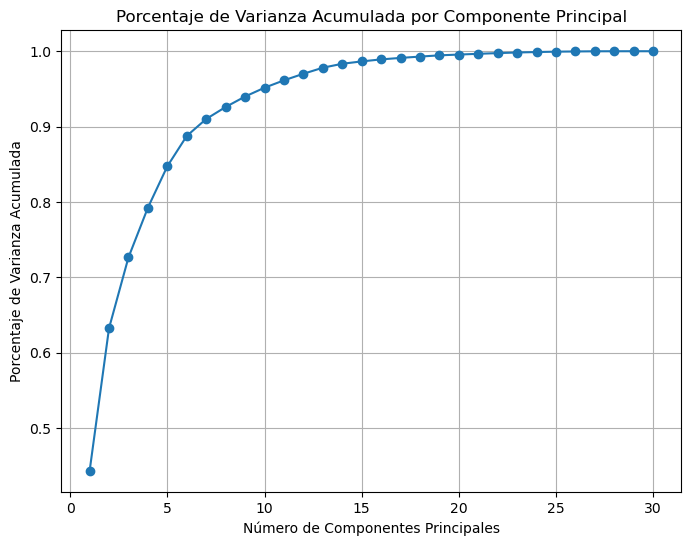

In [38]:
# Porcentaje de varianza explicada acumulada.
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

# Número mínimo de componentes que explique más del 90% de la varianza.
num_components_90 = np.argmax(explained_variance_ratio_cumulative >= 0.99) + 1

# Información de los componentes principales.
print(f"Número mínimo de componentes para explicar el 99% de la varianza: {num_components_90}")
print("Porcentaje de varianza explicada acumulada por cada componente principal:")
for i, ratio in enumerate(explained_variance_ratio_cumulative):
    print(f"Componente {i + 1}: {ratio:.4f}")

# Curva del porcentaje de varianza acumulada.
plt.figure(figsize = (8, 6))
#colour = np.where(explained_variance_ratio_cumulative>=0.99,'k',np.where(len(explained_variance_ratio_cumulative)<5,'b','r'))

plt.plot(range(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative, marker = 'o')
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Porcentaje de Varianza Acumulada")
plt.title("Porcentaje de Varianza Acumulada por Componente Principal")
plt.grid(True)
plt.show()

In [39]:
pca_df = pd.DataFrame(abs(pca.components_[:num_components_90]), columns = X.columns, index = ['Principal component {}'.format(i) for i in range(1, num_components_90 + 1)])
pca_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
Principal component 1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
Principal component 2,0.233857,0.059706,0.215181,0.231077,0.186113,0.151892,0.060165,0.034768,0.190349,0.366575,...,0.219866,0.045467,0.199878,0.219352,0.172304,0.143593,0.097964,0.008257,0.141883,0.275339
Principal component 3,0.008531,0.064550,0.009314,0.028700,0.104292,0.074092,0.002734,0.025564,0.040240,0.022574,...,0.047507,0.042298,0.048547,0.011902,0.259798,0.236076,0.173057,0.170344,0.271313,0.232791
Principal component 4,0.041409,0.603050,0.041983,0.053434,0.159383,0.031795,0.019123,0.065336,0.067125,0.048587,...,0.015417,0.632808,0.013803,0.025895,0.017652,0.091328,0.073951,0.006007,0.036251,0.077053
Principal component 5,0.037786,0.049469,0.037375,0.010331,0.365089,0.011704,0.086375,0.043861,0.305941,0.044424,...,0.004407,0.092883,0.007454,0.027391,0.324435,0.121804,0.188519,0.043332,0.244559,0.094423
Principal component 6,0.018741,0.032179,0.017308,0.001888,0.286374,0.014131,0.009344,0.052050,0.356458,0.119431,...,0.000291,0.050008,0.008501,0.025164,0.369255,0.047706,0.028379,0.030873,0.498927,0.080224
Principal component 7,0.124088,0.011400,0.114477,0.051653,0.140669,0.030918,0.107520,0.150482,0.093891,0.295760,...,0.009710,0.009871,0.000446,0.067832,0.108831,0.140473,0.060488,0.167967,0.018491,0.374658
Principal component 8,0.007452,0.130675,0.018687,0.034674,0.288975,0.151396,0.072827,0.152322,0.231531,0.177121,...,0.042619,0.036252,0.030559,0.079394,0.205852,0.084020,0.072468,0.036171,0.228225,0.048361
Principal component 9,0.223110,0.112699,0.223739,0.195586,0.006425,0.167841,0.040591,0.111971,0.256040,0.123741,...,0.112141,0.103341,0.109614,0.080732,0.112316,0.100678,0.161909,0.060488,0.064638,0.134174
Principal component 10,0.095486,0.240934,0.086386,0.074956,0.069293,0.012936,0.135602,0.008055,0.572069,0.081103,...,0.077362,0.029551,0.050508,0.069921,0.128305,0.172134,0.311639,0.076648,0.029563,0.012610


9. Con el número de componentes determinado, estamos listos para generar un modelo `logr_model3` con PCA. Construye un pipeline que incluya el escalamiento estándar, el PCA con el número de componentes determinado y regresión logística. Entrena el modelo utilizando el  conjunto de entrenamiento y evalúalo en el conjunto de prueba con las mismas métricas.

In [40]:
numerical_features = X.select_dtypes(include=['int', 'double']).columns
preprocessing = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features)])

PRECISION = TP / (TP + FP)  ==> 40 / (40 + 0)  = 1.0
RECALL    = TP / (TP + FN)  ==> 40 / (40 + 2) = 0.9523809523809523
ACCURANCY = (TP + TN) / (TP + TN + FP + FN) ==> (40 + 72) / (40 + 72 + 0 + 2) = 0.9824561403508771


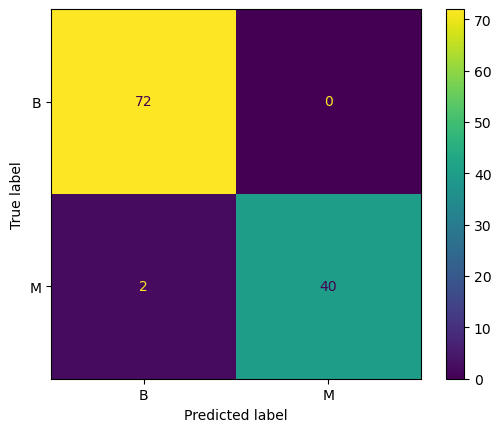

In [41]:
logr_model3 = make_pipeline(preprocessing, PCA(n_components=num_components_90), LogisticRegression())
logr_model3.fit(X_train, y_train)
prediction = logr_model3.predict(X_test)
infoLogisticReg(y_test, prediction, logr_model3, 'M')

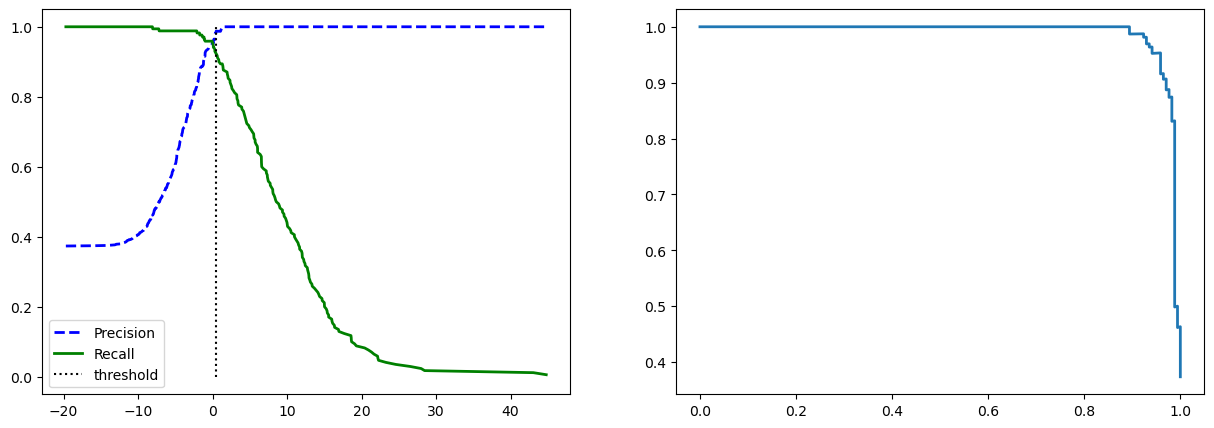

In [42]:
plotLogisticReg(0.5, logr_model3, X_train, y_train, 'M')

10. En un modelo de diagnóstico médico, ¿cuál consideras que es la métrica más importante? ¿Cómo cambiarías (disminuir/aumentar) el *threshold*? ¿Por qué? 

Se debería considerar la metríca Recall para considerar un diágnostico médico en el cual se esta realizando la observación.